<div style="border:solid green 2px; padding: 20px">

<h1> Описание проекта </h1>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#  Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [2]:
games=pd.read_csv('/datasets/games.csv', sep=",")

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Вывод

Считали нашу таблицу с разделителем запятая. Получили 11 столбцов.

В таблице наблюдаются пропуски.  Предстоит провести предобработку данных, выбрать нужные типы, исправить артефакты.

# Предобработка данных

## Замена названия столбцов

In [6]:
games=games.rename(str.lower, axis='columns')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Обработка пропусков

In [7]:
print('Процент игр без названия: {:.2%}'.format((games[games['name'].isnull()==True]['platform'].count())/(games['platform'].count())))

Процент игр без названия: 0.01%


In [8]:
games.drop(games[games['name'].isnull()==True].index, inplace = True) 
games=games.reset_index(drop=True)
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [9]:
print('Процент игр без года выпуска: {:.2%}'.format((games[games['year_of_release'].isnull()==True]['platform'].count())/(games['platform'].count())))

Процент игр без года выпуска: 1.61%


In [10]:
games.drop(games[games['year_of_release'].isnull()==True].index, inplace = True) 
games=games.reset_index(drop=True)
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

## Замена типов

In [11]:
games['year_of_release']=games['year_of_release'].astype(int)
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16439    2016
16440    2006
16441    2016
16442    2003
16443    2016
Name: year_of_release, Length: 16444, dtype: int64

In [12]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [13]:
games['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [14]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

TBD - игра, которая ещё будет оценена. На время анализа заменим эту абревиатуру пропусками.

In [15]:
games['user_score']=games['user_score'].replace('tbd', np.nan)
games['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16439    NaN
16440    NaN
16441    NaN
16442    NaN
16443    NaN
Name: user_score, Length: 16444, dtype: object

In [16]:
games['user_score']=games['user_score'].astype(float)
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16439    NaN
16440    NaN
16441    NaN
16442    NaN
16443    NaN
Name: user_score, Length: 16444, dtype: float64

## Суммарные продажи

In [17]:
games['all_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [18]:
games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411,-0.267851,-0.076220
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.240083,0.085549,0.941241
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.221276,0.055530,0.901673
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.153474,0.126372,0.613305
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.198410,0.056935,0.748930
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000,0.579671,0.245349
user_score,-0.267851,0.085549,0.055530,0.126372,0.056935,0.579671,1.000000,0.087984
all_sales,-0.076220,0.941241,0.901673,0.613305,0.748930,0.245349,0.087984,1.000000


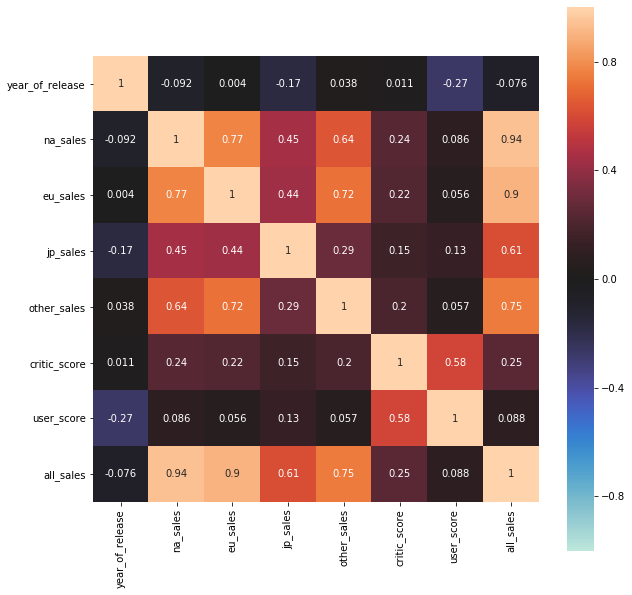

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(games.corr(),vmin=-1, vmax=1, center= 0,square=True,annot=True)

In [20]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
all_sales          16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


None

## Проверка на дубли

In [21]:
games['name'].value_counts()

Need for Speed: Most Wanted                           12
FIFA 14                                                9
LEGO Marvel Super Heroes                               9
Ratatouille                                            9
LEGO Jurassic World                                    8
                                                      ..
Gears of War: Judgment                                 1
World Championship Rugby                               1
Shrek 2: Beg for Mercy                                 1
Imagine: Wedding Designer                              1
Nogizaka Haruka no Himitsu Cosplay, Hajime Mashita     1
Name: name, Length: 11426, dtype: int64

In [22]:
games[games['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
252,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
519,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1976,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2025,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3531,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6177,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6310,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


## Вывод

Название игры и год выпуска мы не заможем заполнить самостоятельно. Посчитали процент пропусков таких значений и спокойно удалили их.

Привели нужные типы, пропуски в оценках не смогли заполнить (Достаточно большое отклонение и нет весомой коррелиации с другими данными).

Проверили дубли, полных дублей нет, есть разные платформы и ремастеры.

# Исследовательский анализ данных

## Выпуск игр по годам

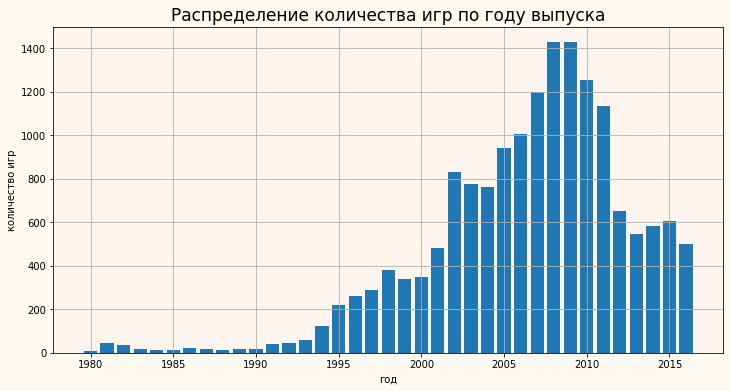

In [23]:
fig, ax = plt.subplots()
x=games.groupby('year_of_release')['name'].count().index
y=games.groupby('year_of_release')['name'].count()
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('год')
ax.set_ylabel('количество игр')
ax.grid()
plt.title('Распределение количества игр по году выпуска', fontsize=17)
plt.show()

Пик продаж был в 2008 и 2009 годах, после продажи начали падать. 

При планировании рекламной компании на будущий год данные по всем прошлым годам не нужны. Достаточно выбрать актуальный на данным момент период и отталкиваться от него.

## Продажи по платформам

In [24]:
sales_by_year=games.groupby(['year_of_release','platform'])['all_sales'].sum().reset_index()
sales_by_year

,year_of_release,platform,all_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
233,2016,PSV,4.25
234,2016,Wii,0.18
235,2016,WiiU,4.60
236,2016,X360,1.52


In [25]:
sales_by_year['year_of_release'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [26]:
sales_by_year['platform'].unique()

array(['2600', 'NES', 'DS', 'PC', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD',
       '3DO', 'PS', 'SAT', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'GBA',
       'PS2', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

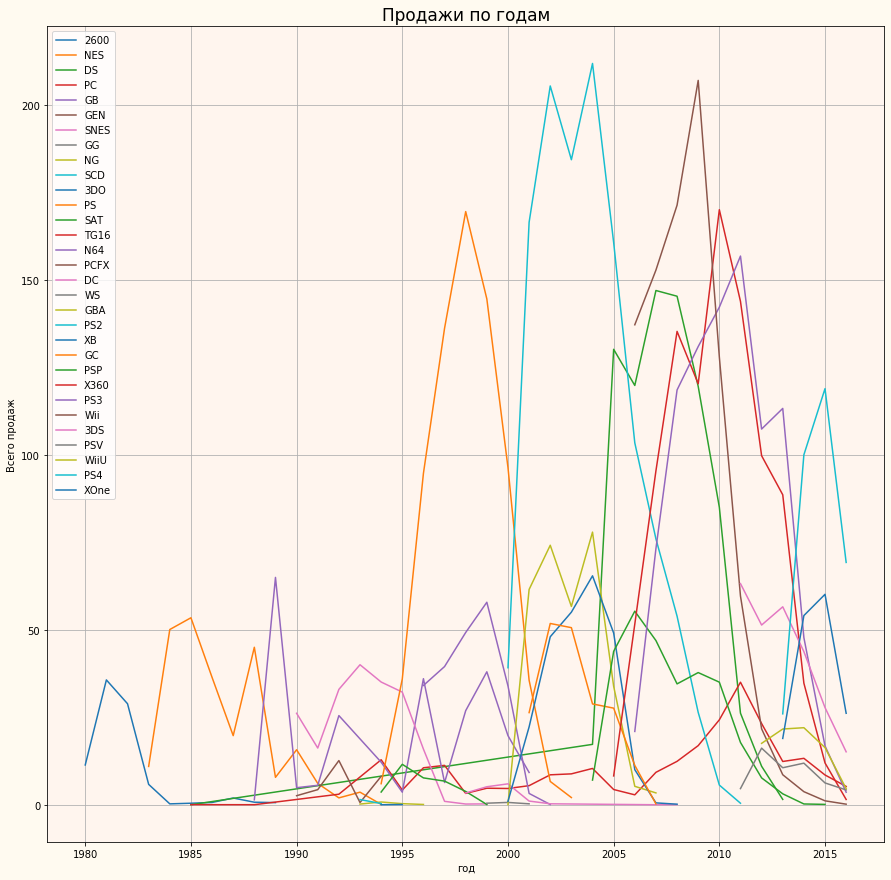

In [27]:
fig, ax = plt.subplots()
for i in sales_by_year['platform'].unique():
    x=sales_by_year[sales_by_year['platform']==i]['year_of_release']
    y=sales_by_year[sales_by_year['platform']==i]['all_sales']
    ax.plot(x , y, label=i)
ax.set_facecolor('seashell')
fig.set_figwidth(15)
fig.set_figheight(15)
fig.set_facecolor('floralwhite')
ax.set_xlabel('год')
ax.set_ylabel('Всего продаж')
ax.grid()
plt.title('Продажи по годам', fontsize=17)
plt.legend()
plt.show()

График для всех платформ получился не информативен. Выбирем самые продоваемые.

In [28]:
sales_by_year.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

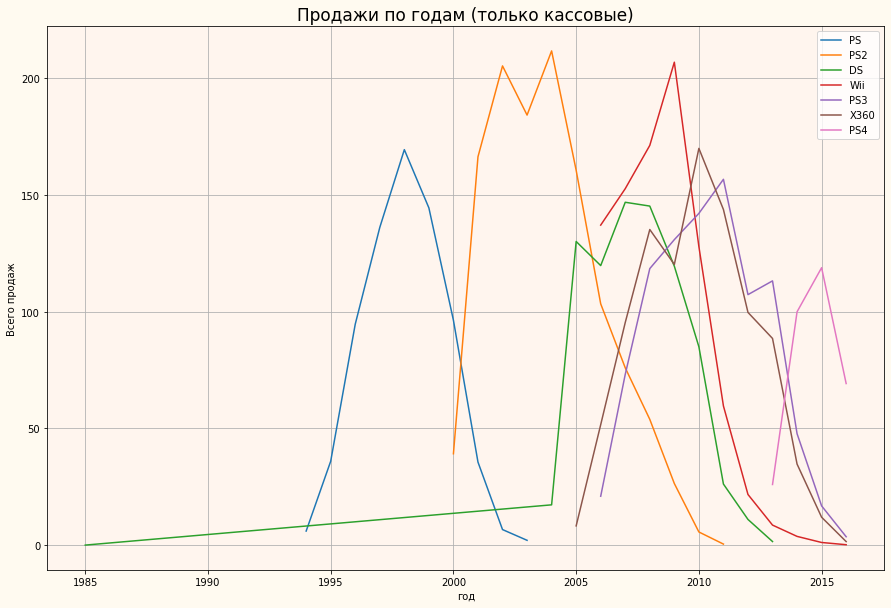

In [29]:
fig, ax = plt.subplots()
for i in sales_by_year[sales_by_year['all_sales']>100]['platform'].unique():
    x=sales_by_year[sales_by_year['platform']==i]['year_of_release']
    y=sales_by_year[sales_by_year['platform']==i]['all_sales']
    ax.plot(x , y, label=i)
ax.set_facecolor('seashell')
fig.set_figwidth(15)
fig.set_figheight(10)
fig.set_facecolor('floralwhite')
ax.set_xlabel('год')
ax.set_ylabel('Всего продаж')
ax.grid()
plt.title('Продажи по годам (только кассовые)', fontsize=17)
plt.legend()
plt.show()

В среднем новой приставки хватает примерно на 7 лет, затем на рынок выходит новая версия. 

SONY только недавно выпустили 4 версию своей приставки, поэтому продажи 3 версии пошли на спад. Ожидается рост продаж новой версии.

## Продажи по годам за актуальный период

In [30]:
actual_games=games.query('year_of_release>=2010')
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [31]:
actual_sales_by_year=actual_games.groupby(['year_of_release','platform'])['all_sales'].sum().reset_index()
actual_sales_by_year

,year_of_release,platform,all_sales
0,2010,DS,85.02
1,2010,PC,24.28
2,2010,PS2,5.64
3,2010,PS3,142.17
4,2010,PSP,35.04
...,...,...,...
60,2016,PSV,4.25
61,2016,Wii,0.18
62,2016,WiiU,4.60
63,2016,X360,1.52


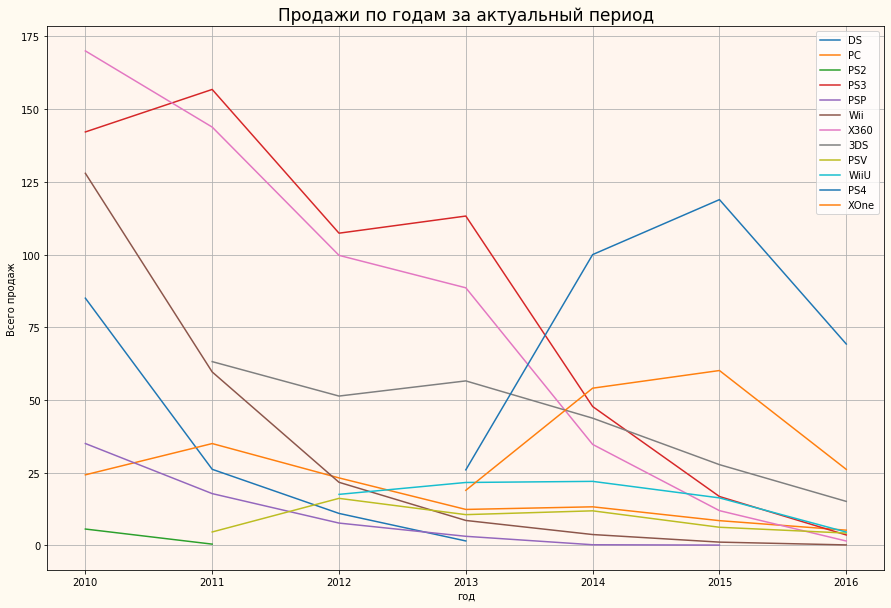

In [32]:
fig, ax = plt.subplots()
for i in actual_sales_by_year['platform'].unique():
    x=actual_sales_by_year[actual_sales_by_year['platform']==i]['year_of_release']
    y=actual_sales_by_year[actual_sales_by_year['platform']==i]['all_sales']
    ax.plot(x , y, label=i)
ax.set_facecolor('seashell')
fig.set_figwidth(15)
fig.set_figheight(10)
fig.set_facecolor('floralwhite')
ax.set_xlabel('год')
ax.set_ylabel('Всего продаж')
ax.grid()
plt.title('Продажи по годам за актуальный период', fontsize=17)
plt.legend()
plt.show()

На данный момент выделяются только две потенциальо прибыльные платформы - PS4 и XOne.

## График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [33]:
actual_games.groupby('platform')['all_sales'].sum()

platform
3DS     257.81
DS      123.75
PC      121.96
PS2       6.09
PS3     587.74
PS4     314.14
PSP      64.05
PSV      53.81
Wii     222.97
WiiU     82.19
X360    550.41
XOne    159.32
Name: all_sales, dtype: float64

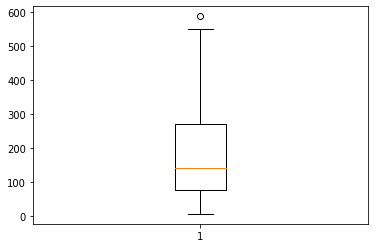

In [34]:
plt.boxplot(actual_games.groupby('platform')['all_sales'].sum(),autorange=True)
plt.show()

За последние 7 лет продажи игр для каждой платформы обычно находятся в диапазоне от 100 до 300 млн копий. Среди остальных ярко выделяются PS и Xbox.

## Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

In [35]:
actual_games[actual_games['platform']=='PS3'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.145286,-0.087431,-0.010731,-0.095880,0.059708,-0.163263,-0.113029
na_sales,-0.145286,1.000000,0.826120,0.341125,0.865736,0.419172,0.065987,0.934858
eu_sales,-0.087431,0.826120,1.000000,0.381738,0.981592,0.357888,0.032767,0.966581
jp_sales,-0.010731,0.341125,0.381738,1.000000,0.389513,0.206597,0.180287,0.453841
other_sales,-0.095880,0.865736,0.981592,0.389513,1.000000,0.368415,0.058920,0.977816
critic_score,0.059708,0.419172,0.357888,0.206597,0.368415,1.000000,0.595259,0.400594
user_score,-0.163263,0.065987,0.032767,0.180287,0.058920,0.595259,1.000000,0.065092
all_sales,-0.113029,0.934858,0.966581,0.453841,0.977816,0.400594,0.065092,1.000000


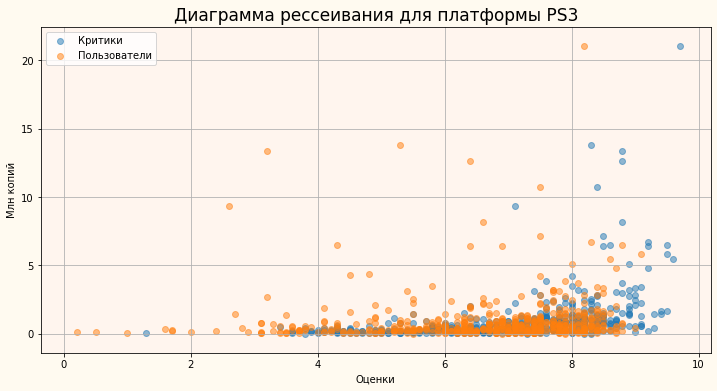

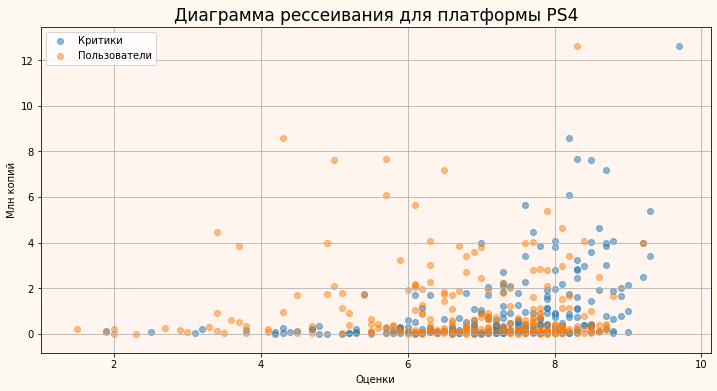

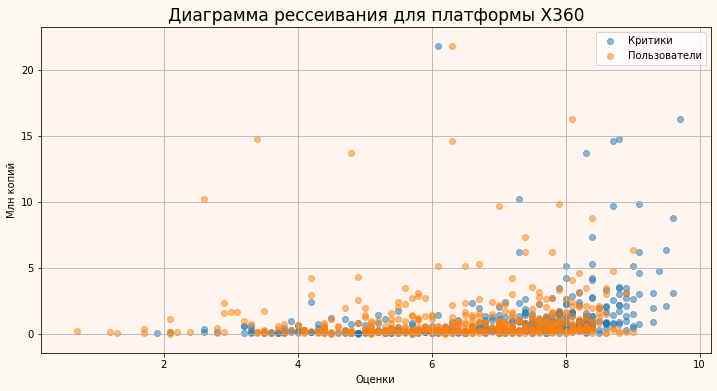

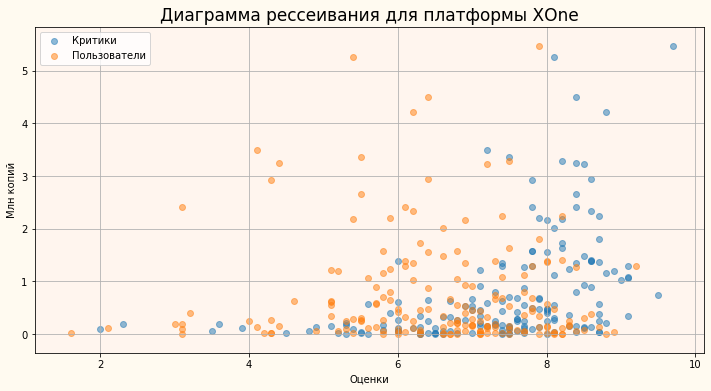

In [36]:
for i in ['PS3','PS4','X360','XOne']:
    fig, ax = plt.subplots()
    x1=actual_games[actual_games['platform']==i]['critic_score']/10
    x2=actual_games[actual_games['platform']==i]['user_score']
    y=actual_games[actual_games['platform']==i]['all_sales']
    ax.scatter(x1 , y,label='Критики',alpha = 0.5)
    ax.scatter(x2 , y,label='Пользователи',alpha = 0.5)
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('Оценки')
    ax.set_ylabel('Млн копий')
    ax.grid()
    plt.title('Диаграмма рессеивания для платформы '+i, fontsize=17)
    plt.legend()
    plt.show()

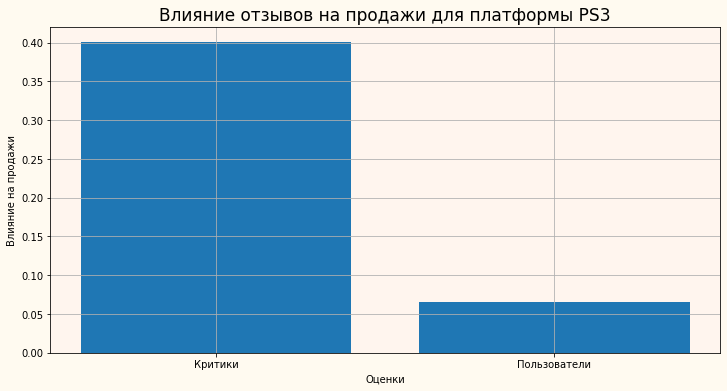

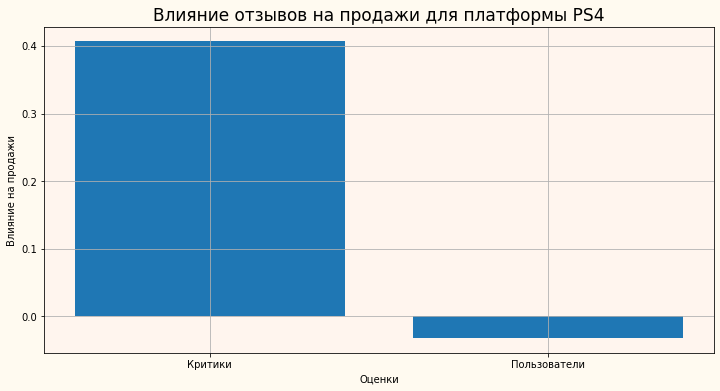

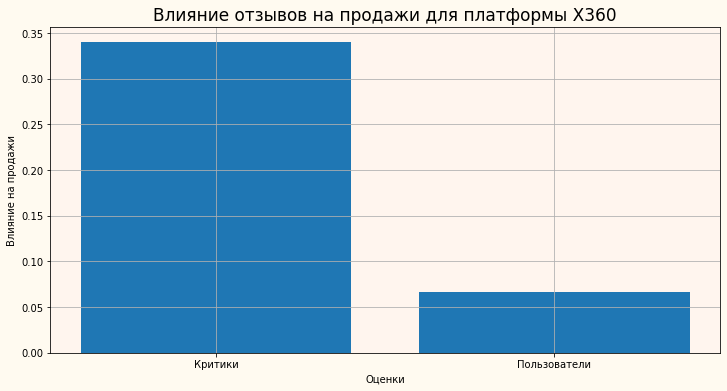

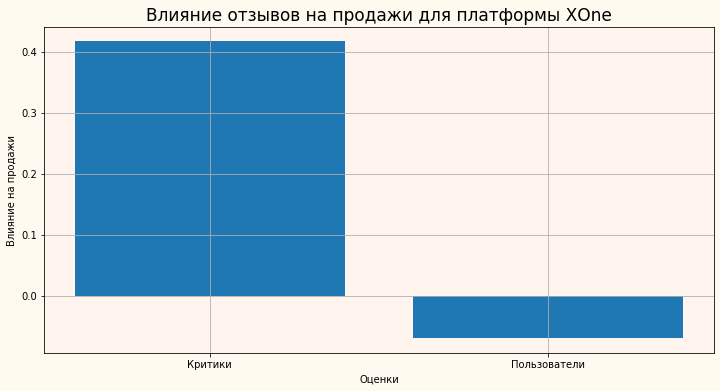

In [37]:
for i in ['PS3','PS4','X360','XOne']:
    fig, ax = plt.subplots()
    x=['Критики','Пользователи']
    y=[actual_games[actual_games['platform']==i]['critic_score'].corr(actual_games[actual_games['platform']==i]['all_sales']),
      actual_games[actual_games['platform']==i]['user_score'].corr(actual_games[actual_games['platform']==i]['all_sales'])]
    ax.bar(x , y)
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('Оценки')
    ax.set_ylabel('Влияние на продажи')
    ax.grid()
    plt.title('Влияние отзывов на продажи для платформы '+i, fontsize=17)
    plt.show()

Очевидно, что отзывы обычных пользователей реже сказываются на продажах. А вот мнение критиков сильно влияет и понятно зачем компании тратят деньги на предрелизные тесты и опросы.

## Распределение игр по жанрам

In [38]:
actual_games.groupby('genre')['all_sales'].sum().sort_values()

genre
Puzzle           20.60
Strategy         35.84
Adventure        61.00
Simulation       71.75
Fighting         81.59
Platform        119.72
Racing          122.68
Misc            234.56
Role-Playing    315.28
Sports          328.39
Shooter         479.74
Action          673.09
Name: all_sales, dtype: float64

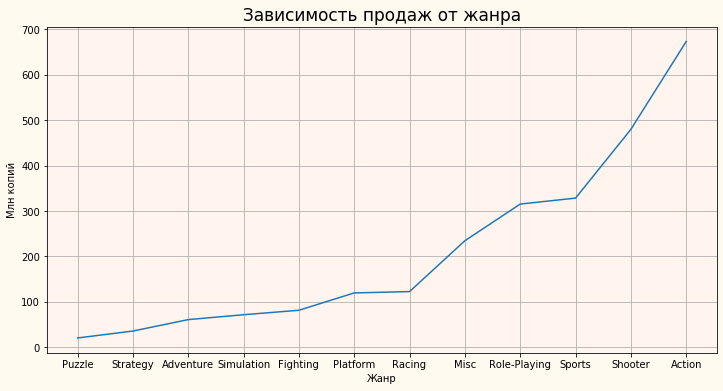

In [39]:
fig, ax = plt.subplots()
x=actual_games.groupby('genre')['all_sales'].sum().sort_values().index
y=actual_games.groupby('genre')['all_sales'].sum().sort_values()
ax.plot(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('Жанр')
ax.set_ylabel('Млн копий')
ax.grid()
plt.title('Зависимость продаж от жанра', fontsize=17)
plt.show()

Явно выделяются жанры :
- с хорошей динамикой :Экшен, Шутер, Спорт и Ролевые игры
- с плохой - пазлы, стратегия, приключения, симуляторы.

# Портрет пользователя каждого региона

## Самые популярные платформы

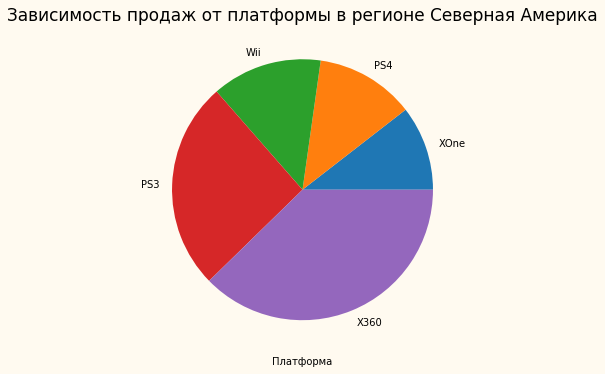

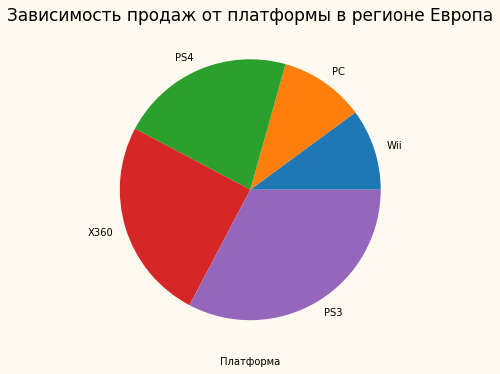

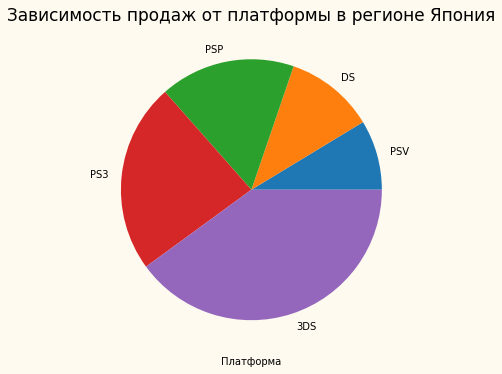

In [40]:
for i,j in zip(['na_sales','eu_sales','jp_sales'],['Северная Америка','Европа','Япония']):
    fig, ax = plt.subplots()
    x=actual_games.groupby('platform')[i].sum().sort_values().tail(5).index
    y=actual_games.groupby('platform')[i].sum().sort_values().tail(5)
    ax.pie(y,labels=x)
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('Платформа')
    plt.title('Зависимость продаж от платформы в регионе '+j, fontsize=17)
    plt.show()

В Северной Америке и Японии больше поддерживают местных производителей (Xbox и PS соответственно). В Европе оба проихводителя находятся в лидерах, Sony уверенно лидирует.

## Самые популярные жанры

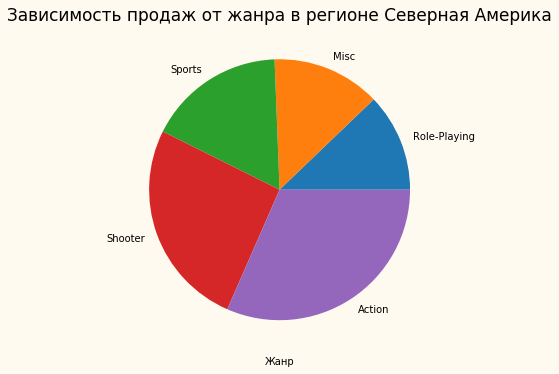

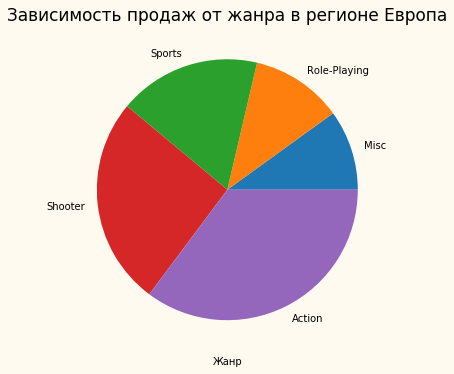

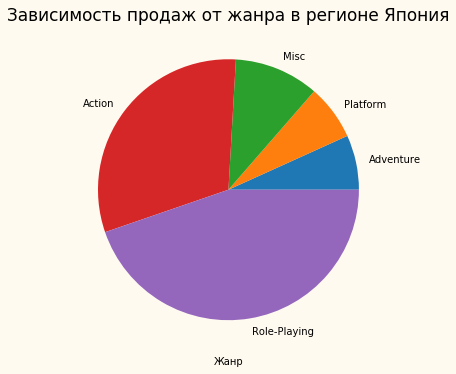

In [41]:
for i,j in zip(['na_sales','eu_sales','jp_sales'],['Северная Америка','Европа','Япония']):
    fig, ax = plt.subplots()
    x=actual_games.groupby('genre')[i].sum().sort_values().tail(5).index
    y=actual_games.groupby('genre')[i].sum().sort_values().tail(5)
    ax.pie(y,labels=x)
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('Жанр')
    plt.title('Зависимость продаж от жанра в регионе '+j, fontsize=17)
    plt.show()

По жанрам у Америки и Европы похожие вкусы. А вот в Японии явно выделяются ролевые игры. На выбор жанра, возможно, влияет культура страны.

## Влияние рейтинга ESRB на продажи

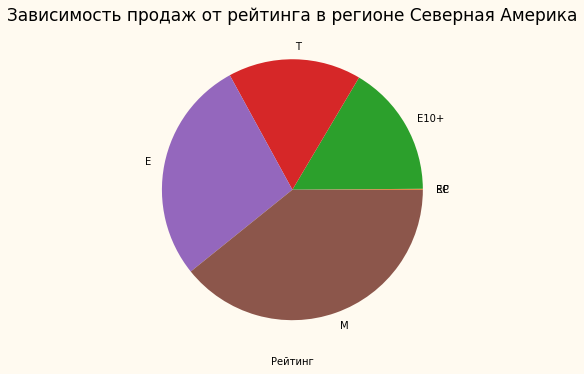

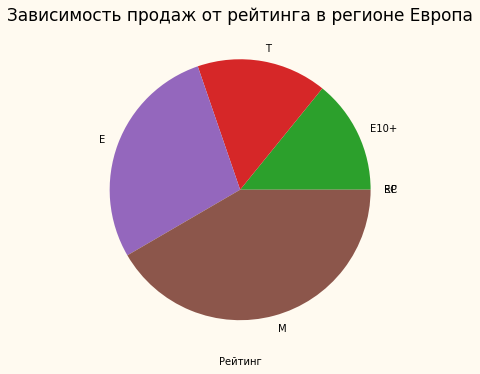

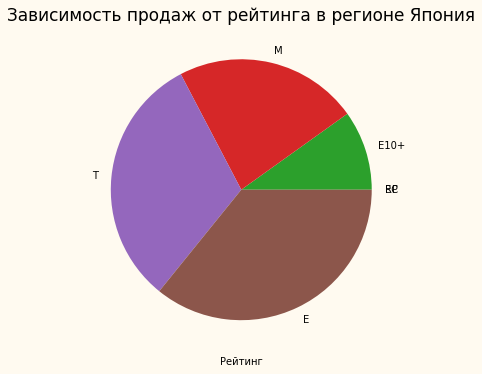

In [42]:
for i,j in zip(['na_sales','eu_sales','jp_sales'],['Северная Америка','Европа','Япония']):
    fig, ax = plt.subplots()
    x=actual_games.groupby('rating')[i].sum().sort_values().index
    y=actual_games.groupby('rating')[i].sum().sort_values()
    ax.pie(y,labels=x)
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('Рейтинг')
    plt.title('Зависимость продаж от рейтинга в регионе '+j, fontsize=17)
    plt.show()

Присутствует различие продаж от продаж между регионами.
- Северная Америка и Европа предпочитают больше М
- Япония примерно одинаково E и T

# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная - разные.

In [43]:
xbox_disp=np.var(actual_games[actual_games['platform']=='XOne']['user_score'],ddof=1)
pc_disp=np.var(actual_games[actual_games['platform']=='PC']['user_score'],ddof=1)
if abs(xbox_disp-pc_disp)>(xbox_disp*0.05):
    print('Дисперсия отличается больше чем на 5 процентов')
else:
    print('Дисперсия почти одинаковая')

Дисперсия отличается больше чем на 5 процентов


In [44]:
sample_xbox = actual_games[(actual_games['platform']=='XOne')&(actual_games['user_score']>0)]['user_score']
sample_pc = actual_games[(actual_games['platform']=='PC')&(actual_games['user_score']>0)]['user_score']
alpha = .05 
results = st.ttest_ind(
    sample_xbox, 
    sample_pc,
    equal_var  =  False 
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


Не смогли отвергнуть нулевую гипотезу - поэтому не можем точно сказать, что оценки разные. (В среднем одинаковые)

## Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная - разные.

In [45]:
action_disp=np.var(actual_games[actual_games['genre']=='Action']['user_score'],ddof=1)
sports_disp=np.var(actual_games[actual_games['genre']=='Sports']['user_score'],ddof=1)
if abs(action_disp-sports_disp)>(action_disp*0.05):
    print('Дисперсия отличается больше чем на 5 процентов')
else:
    print('Дисперсия почти одинаковая')

Дисперсия отличается больше чем на 5 процентов


In [46]:
sample_action = actual_games[(actual_games['genre']=='Action')&(actual_games['user_score']>0)]['user_score']
sample_sports = actual_games[(actual_games['genre']=='Sports')&(actual_games['user_score']>0)]['user_score']
alpha = .05 
results = st.ttest_ind(
    sample_action, 
    sample_sports,
    equal_var  =  False 
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4516152467844418e-15
Отвергаем нулевую гипотезу


Отвергли нулевую гипотезу - поэтому можем точно сказать, что в 99% оценки разные.

# Вывод

Мы провели большой анализ данных, по результатам которого можно выделить несколько критериев, которые помогут спрогнозировать успешные продажи:
 - Нужно больше вкладывать в игры новых платформ, которые только набирают оборот. Таковыми сейчас являются PS4 и XOne
 - в зависимости от региона делать акценты на разные платформы (в Америке и Японии больше поддерживают местных производителей)
 - выбирать жанры, популярные в нужном регионе (Америка и Европа - Экшн, Шутеры, Спорт. Япония - Экшн и Ролевые игры)
 - больше приносят деньги игры с рейтингом М, Е или Т
 - хорошие отзывы критиков, обычно, дают хорошие продажи
 - плохие отзывы пользователей ещё не значят провал продаж

В конце проекта провепили пару теорий и смогли сделать следующие выводы:
 - чаще всего средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - и почти всегда средние пользовательские рейтинги жанров Action и Sports разные